In [36]:
import numpy as np
import pandas as pd

In [37]:
# Import Data
df = pd.read_csv("bert_tokenizing.csv")
df = df.drop(["Unnamed: 0"], axis=1)

In [38]:
# Drop Errors and NAN values
df = df[df['turn_over_rate']<1]
error_firm = ['동원홈푸드','휠라홀딩스','트리','와디즈','키위컴퍼니','줌인터넷','시선인터내셔널','브이티코스메틱','유니슨이테크','씨엠비대전방송','서울비젼','더메인즈','조은시스템']

for i in error_firm:
    df = df[df.company_name != i]

# Rename the columns
df = df.rename(columns={"average_salary":"average_salary(만원)", "total_sale":"total_sale(억원)"})


In [39]:
df

,company_name,adv topic0,adv topic1,adv topic2,adv topic3,adv topic4,adv topic5,adv topic6,adv topic7,adv topic8,...,dadv topic2,dadv topic3,dadv topic4,dadv topic5,dadv topic6,dadv topic7,dadv topic8,average_salary(만원),total_sale(억원),turn_over_rate
0,국민건강보험공단,5.280826e-03,1.029369e-01,6.762364e-01,7.424347e-02,4.341856e-02,4.418637e-02,0.019888,2.692723e-02,6.882035e-03,...,9.172517e-308,3.834241e-308,1.754403e-308,1.649834e-308,1.666764e-308,1.889073e-308,1.838488e-308,6441,75400.0,0.20
1,근로복지공단,2.513413e-03,5.111293e-02,3.613054e-02,4.160567e-02,3.032847e-02,3.495843e-02,0.006159,1.357797e-02,3.410312e-03,...,1.002715e-01,3.207409e-02,1.197275e-02,1.060669e-02,1.058645e-02,1.413571e-02,1.384547e-02,5817,9406.2,0.13
2,농협은행,2.470652e-01,5.533099e-01,1.009984e-02,9.417555e-02,2.441039e-02,2.434659e-02,0.007862,1.040537e-02,2.832522e-02,...,1.771654e-307,6.334674e-308,2.753457e-308,2.504505e-308,2.539129e-308,3.101871e-308,2.968390e-308,6182,13100.0,0.15
3,현대카드,6.150348e-03,1.341201e-01,3.405091e-02,1.700571e-01,3.973425e-01,7.748376e-02,0.010209,2.621294e-02,8.961624e-03,...,5.658999e-307,1.000000e+00,1.428297e-307,1.015918e-307,9.693976e-308,2.205164e-307,4.108219e-307,8737,2300.0,0.35
4,중소기업은행,9.843181e-03,1.939104e-01,2.088550e-01,1.530540e-01,1.214821e-01,7.554582e-02,0.029881,7.843534e-02,1.279777e-02,...,3.783521e-307,1.019228e-307,4.363316e-308,3.794189e-308,3.896281e-308,5.244690e-308,4.799315e-308,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,플레이스엠,1.452200e-02,5.351468e-01,7.224577e-03,9.901029e-02,2.044624e-02,1.890625e-02,0.005053,7.793833e-03,1.828451e-02,...,1.974877e-02,7.712075e-03,3.433748e-03,3.177521e-03,3.214126e-03,3.777811e-03,3.650971e-03,3964,165.7,0.45
2496,서울신용평가정보,7.260101e-03,1.401330e-01,1.671527e-01,9.457107e-02,5.220948e-02,4.873405e-02,0.044595,4.240091e-02,9.222801e-03,...,3.926262e-02,3.218512e-02,5.105169e-02,4.445196e-01,5.055556e-02,2.057038e-02,2.402313e-02,3878,466.7,0.54
2498,유끼커뮤니케이션,1.088170e-308,2.009931e-307,9.713374e-308,1.210574e-307,5.839871e-308,5.140841e-308,1.000000,4.193787e-308,1.306959e-308,...,2.150313e-307,1.724128e-307,3.270440e-307,1.000000e+00,3.535837e-307,1.158216e-307,1.310934e-307,4417,28.0,0.14
2501,에이치엔씨네트워크,3.380460e-03,6.570749e-02,7.812780e-01,4.875494e-02,3.253660e-02,2.518413e-02,0.013574,2.525549e-02,4.328404e-03,...,7.741806e-02,7.351771e-02,1.956092e-01,7.020931e-02,6.159684e-02,5.736778e-02,8.170305e-02,3038,336.9,0.68


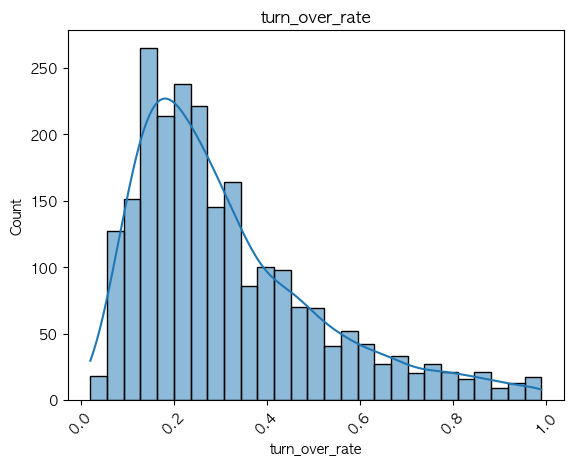

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc

# for Mac
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# Get turn_over_rate graphs

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()

In [41]:
df.columns[1:10]

Index(['adv topic0', 'adv topic1', 'adv topic2', 'adv topic3', 'adv topic4',
       'adv topic5', 'adv topic6', 'adv topic7', 'adv topic8'],
      dtype='object')

In [42]:
adv_list = df.columns[1:10]
adv_col = 5
dadv_list = df.columns[10:-3]
dadv_col = 5
fv_list = df.columns[-3:-1]
fv_col = 1

def graphing_data (col, num):
    plt.figure(figsize=(24,12))
    for i, title in enumerate(col):
        plt.subplot(2,num,i+1)
        plt.title(title+" scatter plot")
        sns.scatterplot(x= df[title].astype(float), y = df['turn_over_rate'])

    # if col[0][-1].isdigit():
    #     if col[0][0] == 'a':
    #         plt.savefig('Advatage_topic_modeling_scatter_plot.png')
    #     if col[0][0] == 'd':
    #         plt.savefig('Disadvatage_topic_modeling_scatter_plot.png')
    # else:
    #     plt.savefig('Financial_variable_scatter_plot.png')
    plt.show()

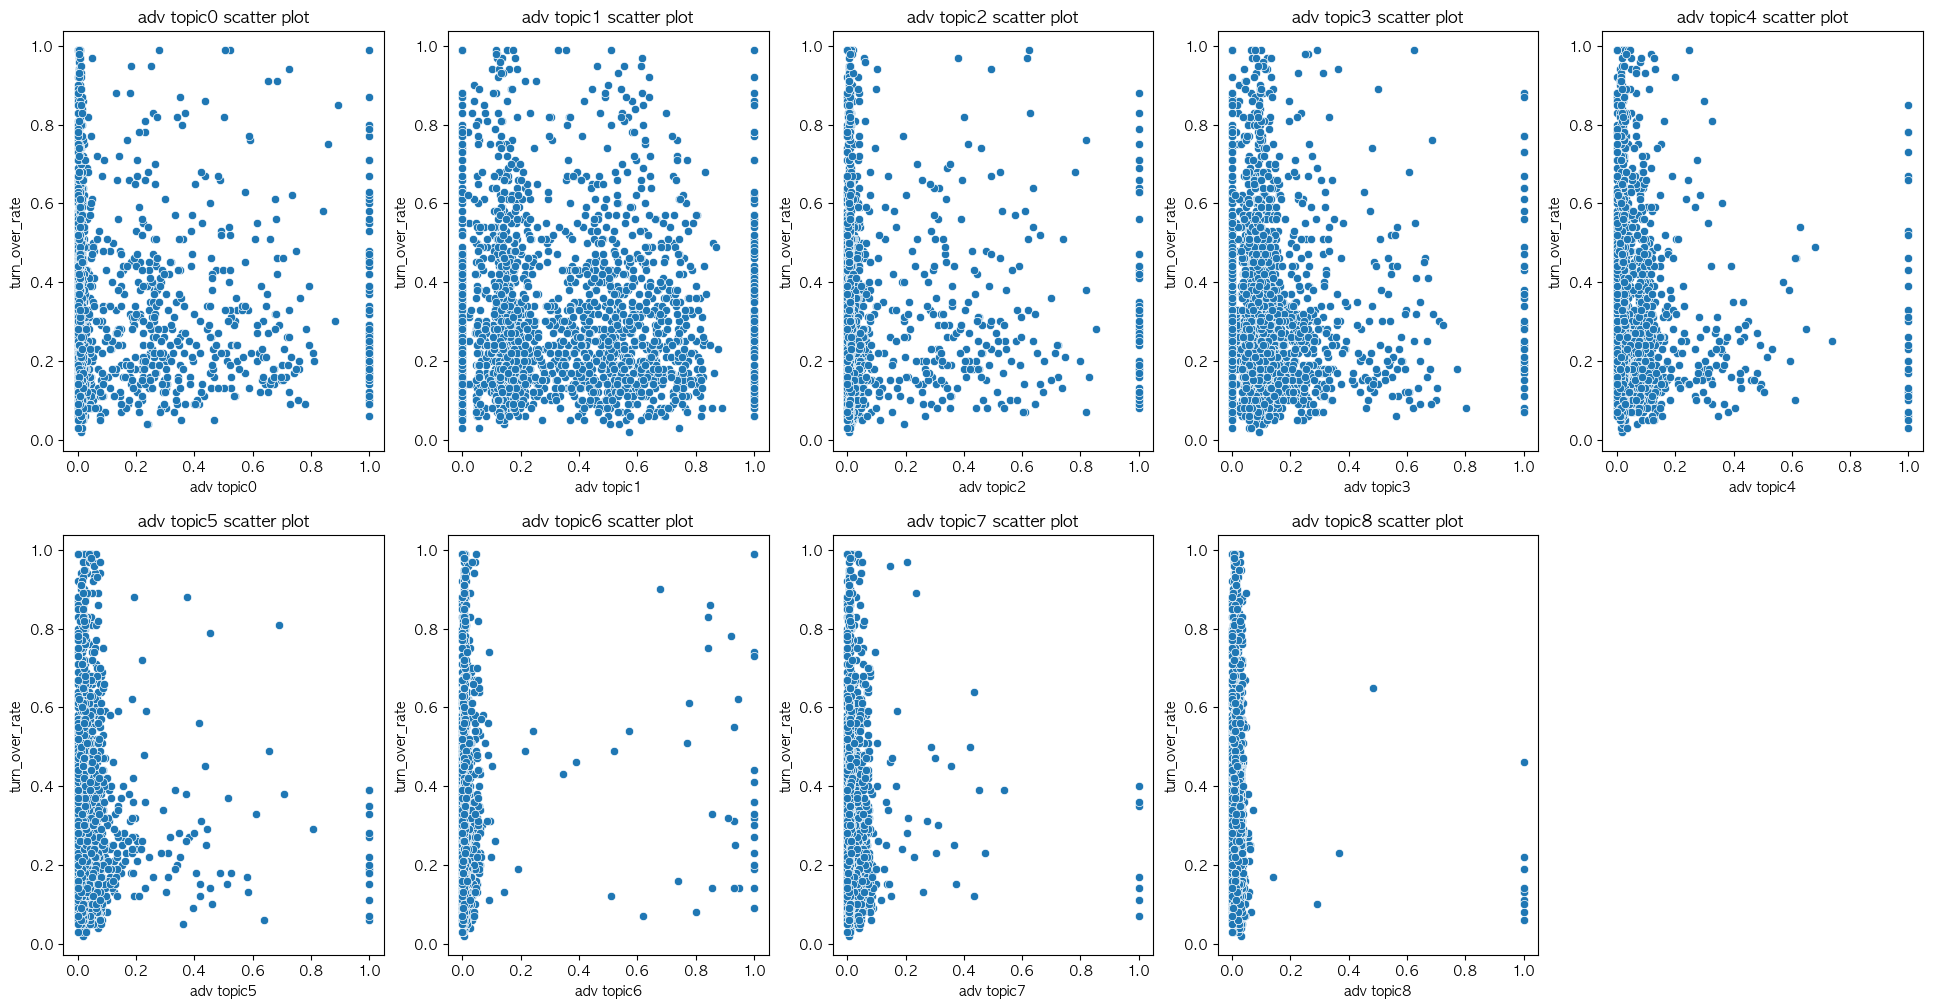

In [43]:
graphing_data(adv_list, adv_col)

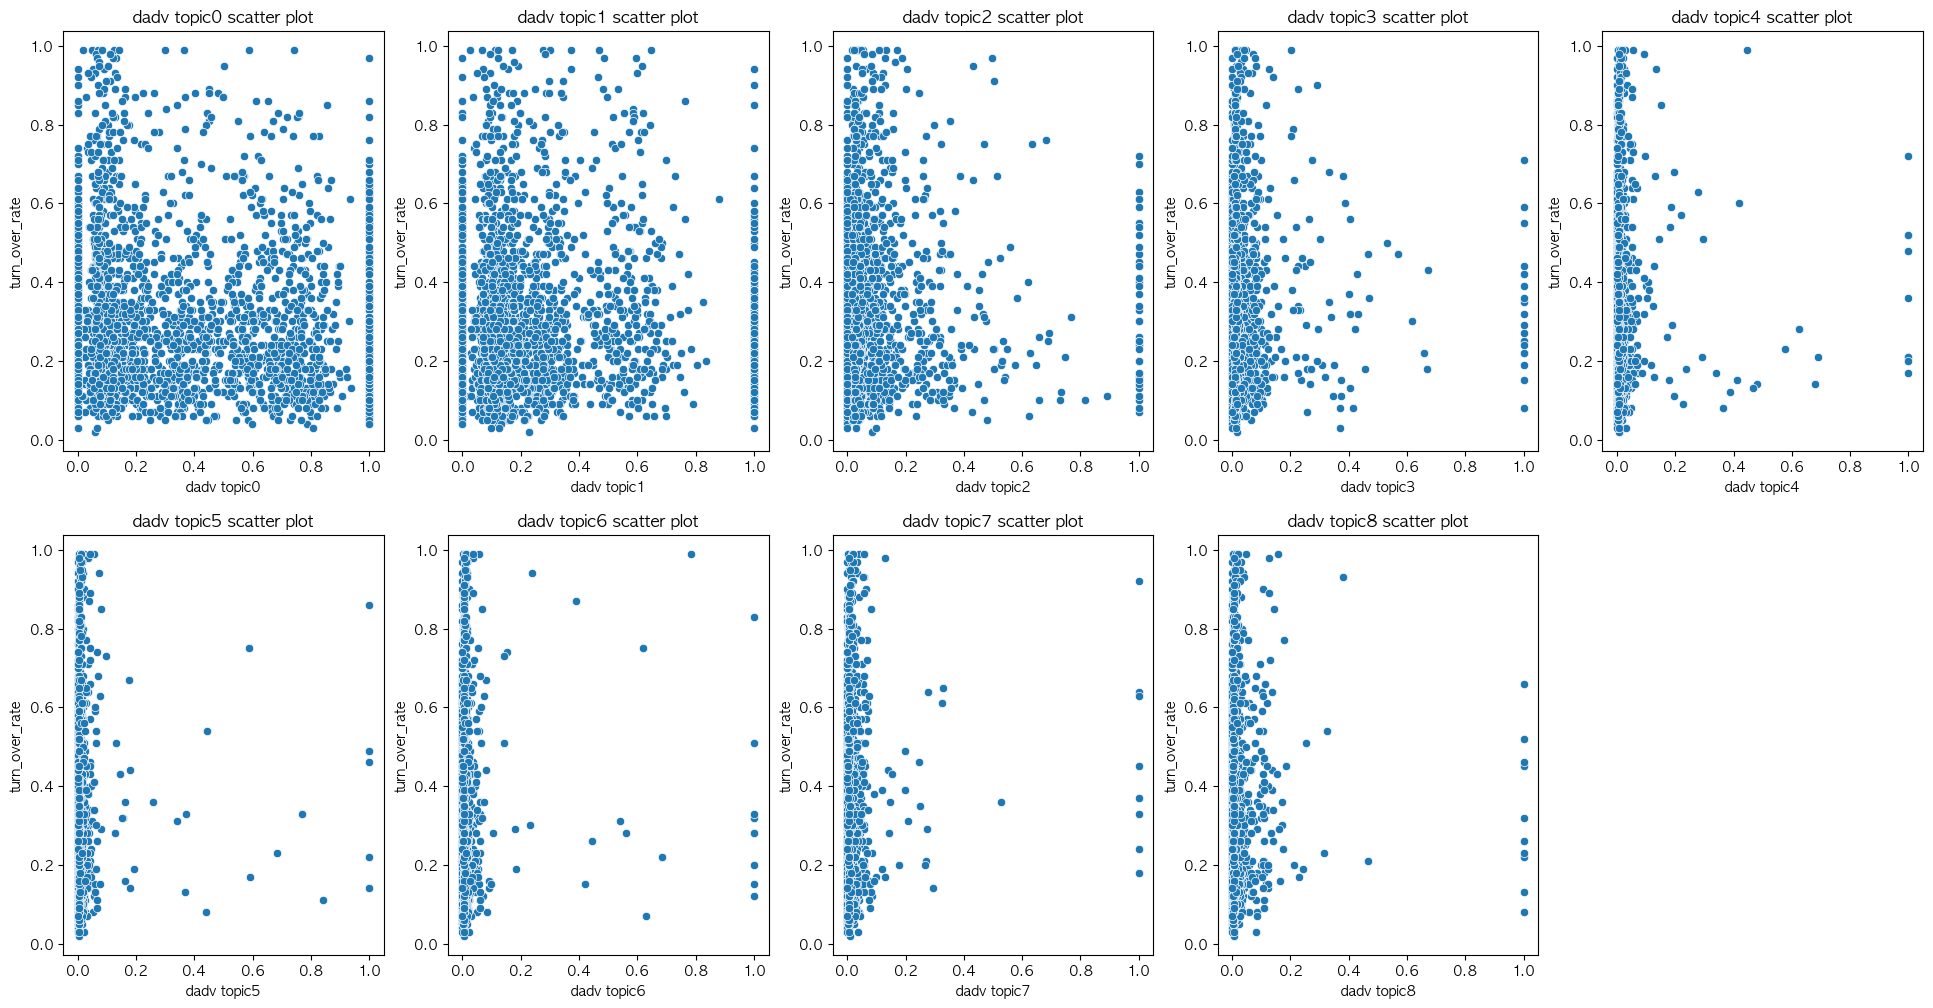

In [44]:
graphing_data(dadv_list,dadv_col)

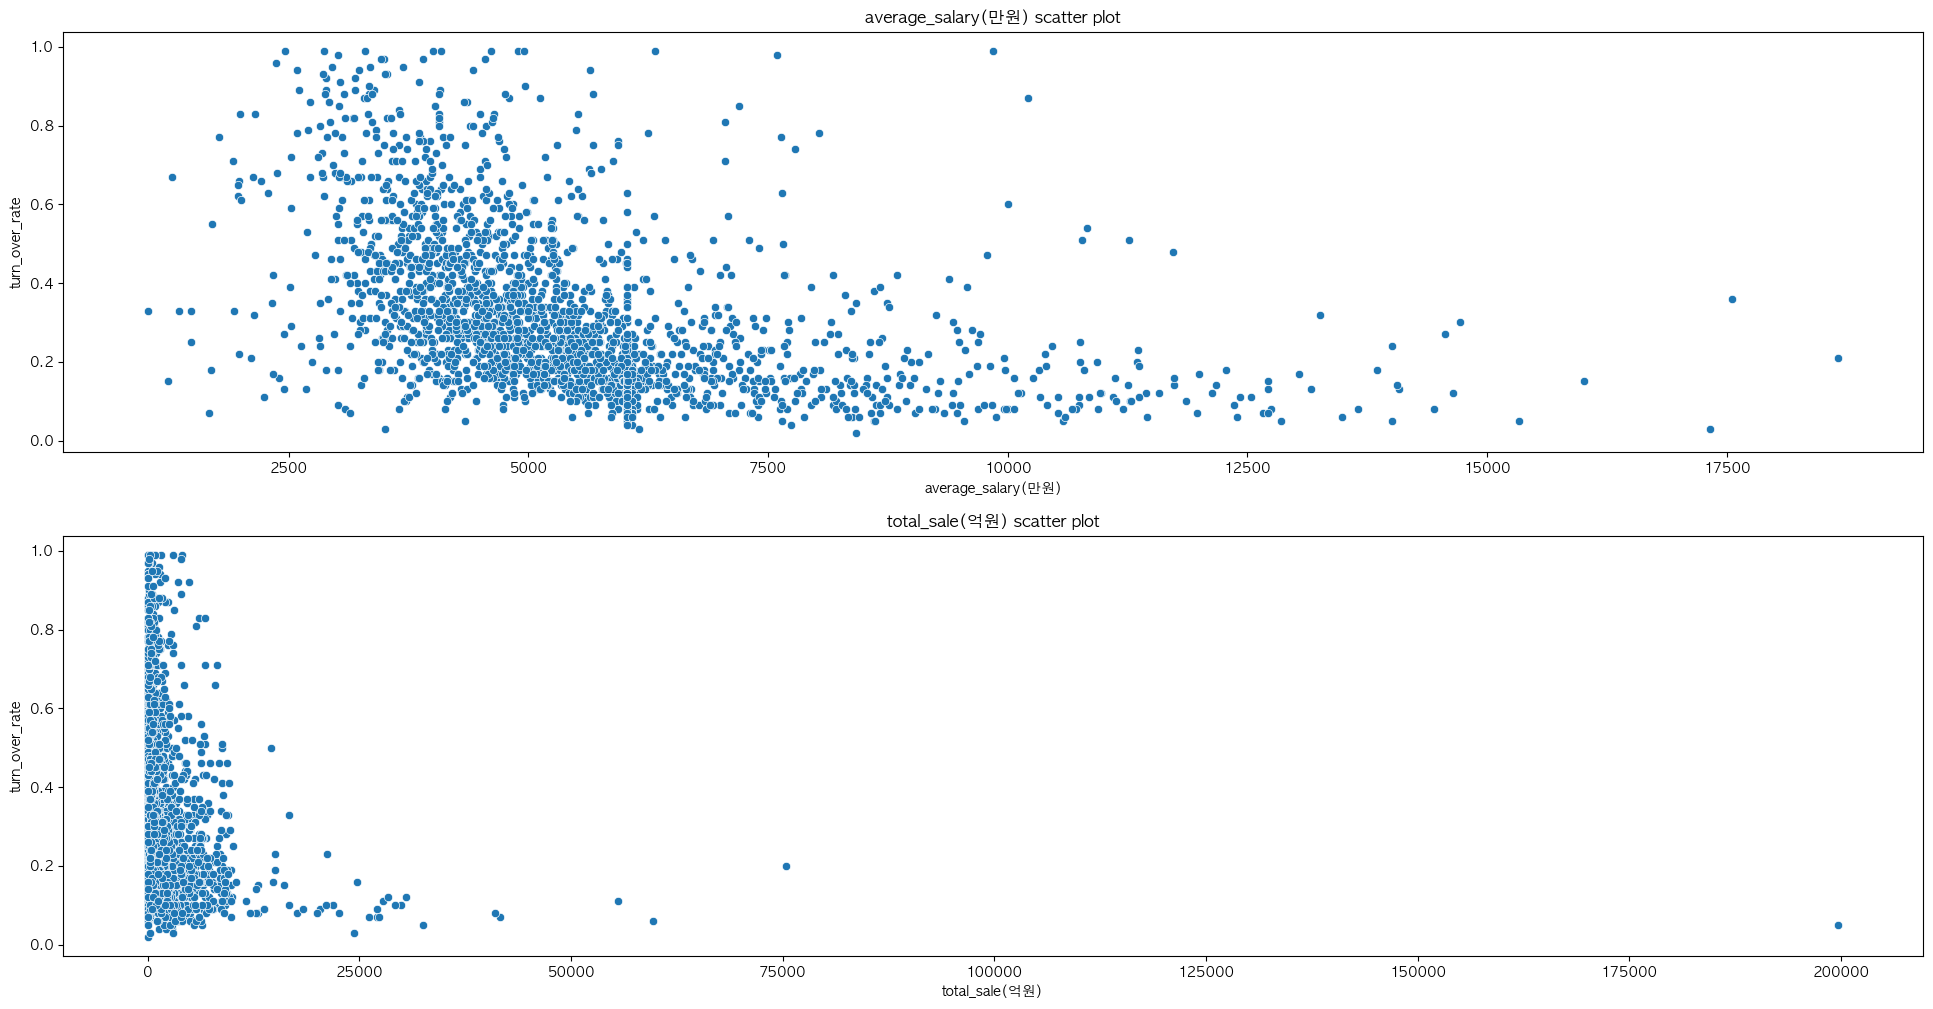

In [45]:
graphing_data(fv_list,fv_col)

**Machine Learning**

Linear, Ridge, Lasso

In [46]:
def get_rmse(model):
    pred = model.predict(X_test.astype(float))
    mse = mean_squared_error(y_test.astype(float), pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [47]:
def get_mae(model):
    pred = model.predict(X_test.astype(float))
    score = mean_absolute_error(y_test.astype(float),pred)
    print(model.__class__.__name__, " MAE: ", np.round(score,3))

In [48]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        # rmses.append(rmse)
    # return rmses

In [49]:
def get_maes(models):
    scores = []
    for model in models:
        score = get_mae(model)
        # scores.append(score)
    # return scores

In [50]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 7)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_maes(models)

LinearRegression  RMSE:  0.174
Ridge  RMSE:  0.174
Lasso  RMSE:  0.172


LinearRegression  MAE:  0.139
Ridge  MAE:  0.139
Lasso  MAE:  0.138


In [51]:
def get_top_bottom_coef(model, n=4):

    coef = pd.Series(model.coef_, index=x_data.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

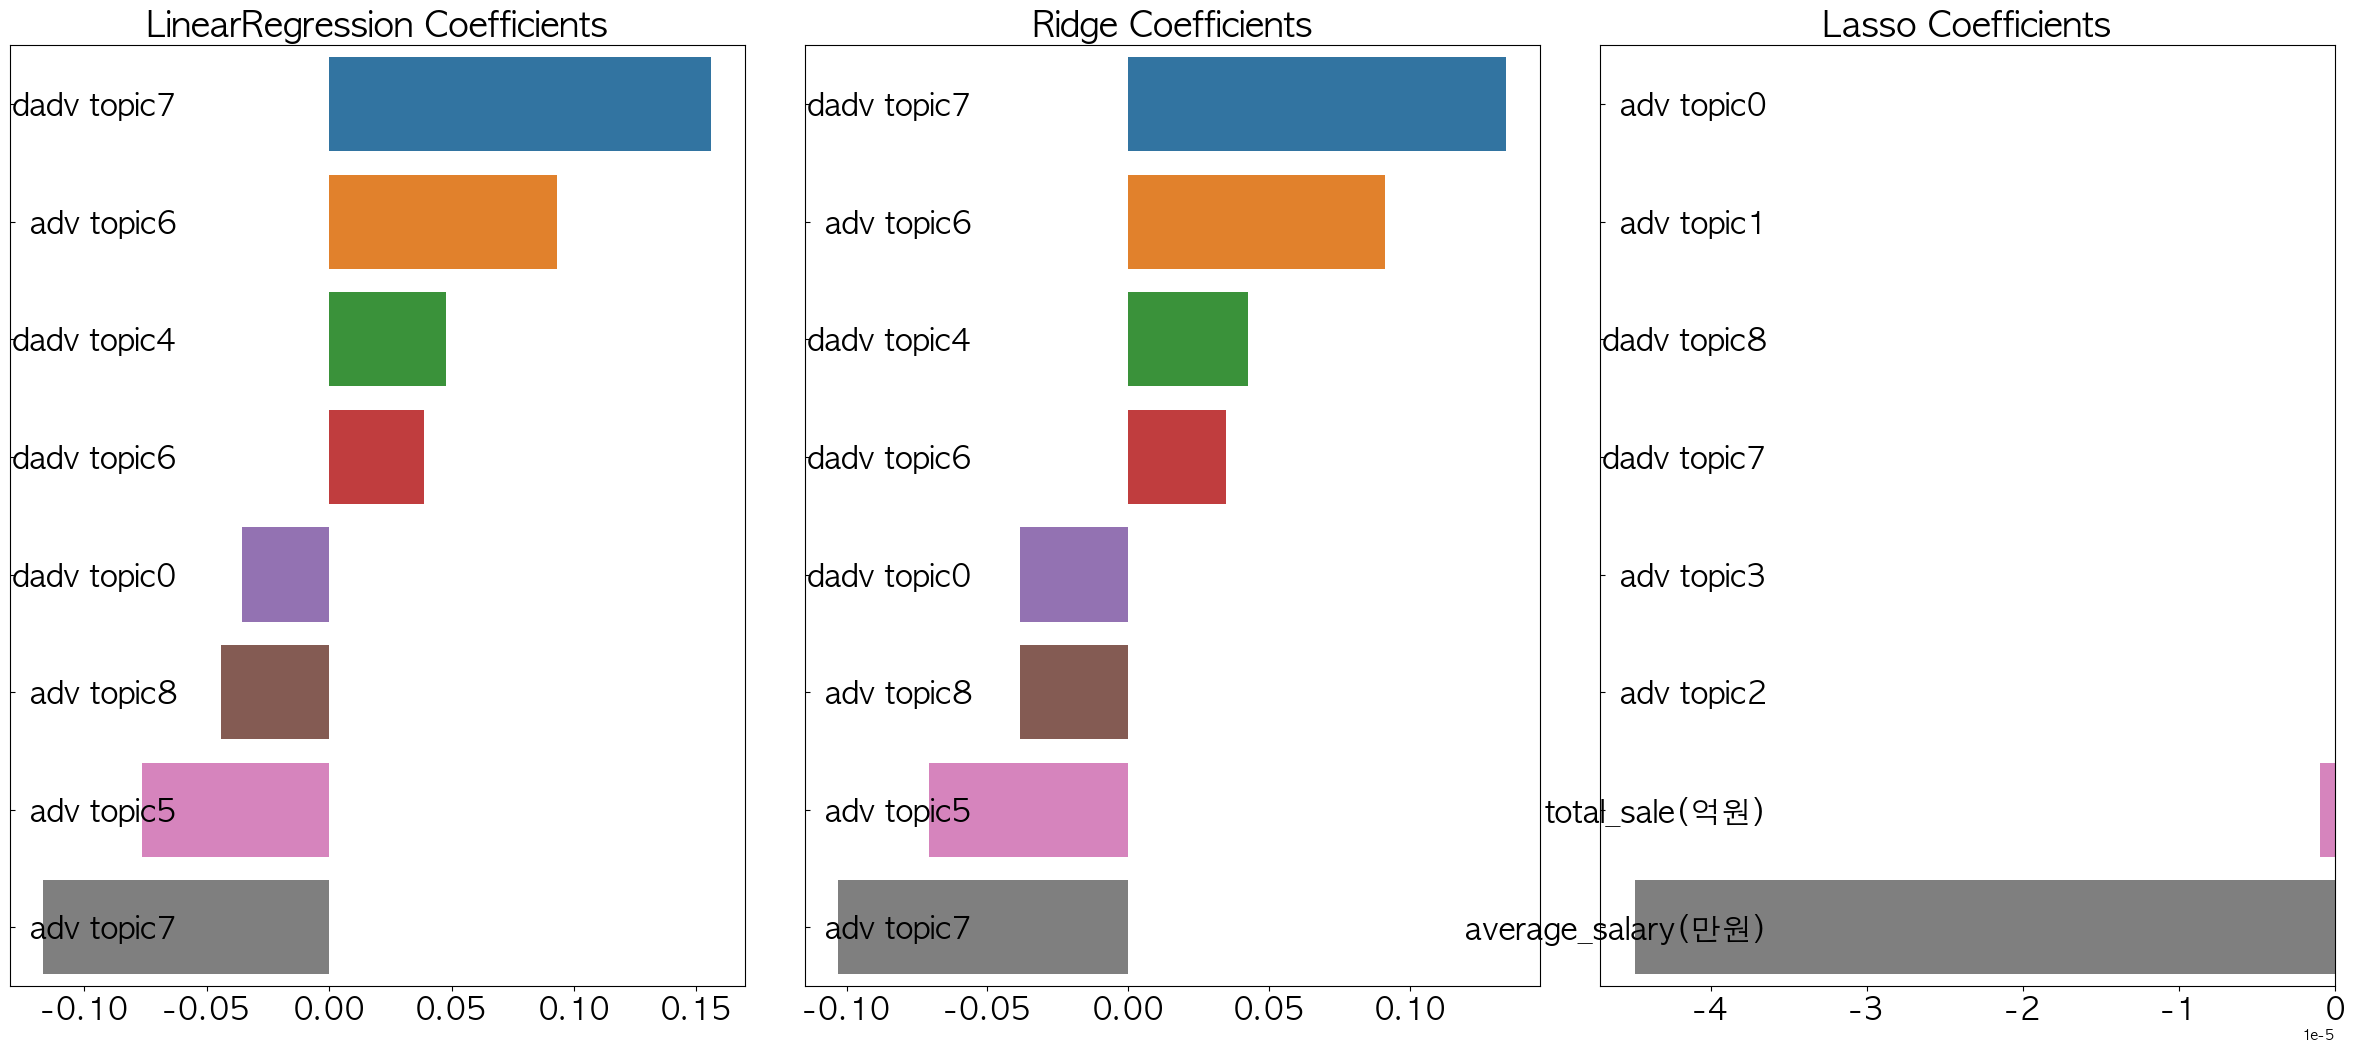

In [52]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols= 3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [53]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:

        rmse_list = np.sqrt(-cross_val_score(model, x_data, y_target,
                                             scoring= 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('\n{0} CV average RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE Value List: [0.17  0.187 0.163 0.179 0.203]

Ridge CV average RMSE Value List: 0.181

Lasso CV RMSE Value List: [0.172 0.185 0.164 0.181 0.201]

Lasso CV average RMSE Value List: 0.181


In [54]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.astype(float),y_train.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    print('\n')     


def save_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.astype(float),y_train.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    print('\n')     

    return grid_model.best_params_

    

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0324, best average RMSE: 0.1799, best alpha: {'alpha': 20}


Lasso After 5 CV, best average MSE: 0.0324, best average RMSE: 0.1799, best alpha: {'alpha': 0.001}




LinearRegression  RMSE:  0.174
Ridge  RMSE:  0.173
Lasso  RMSE:  0.173


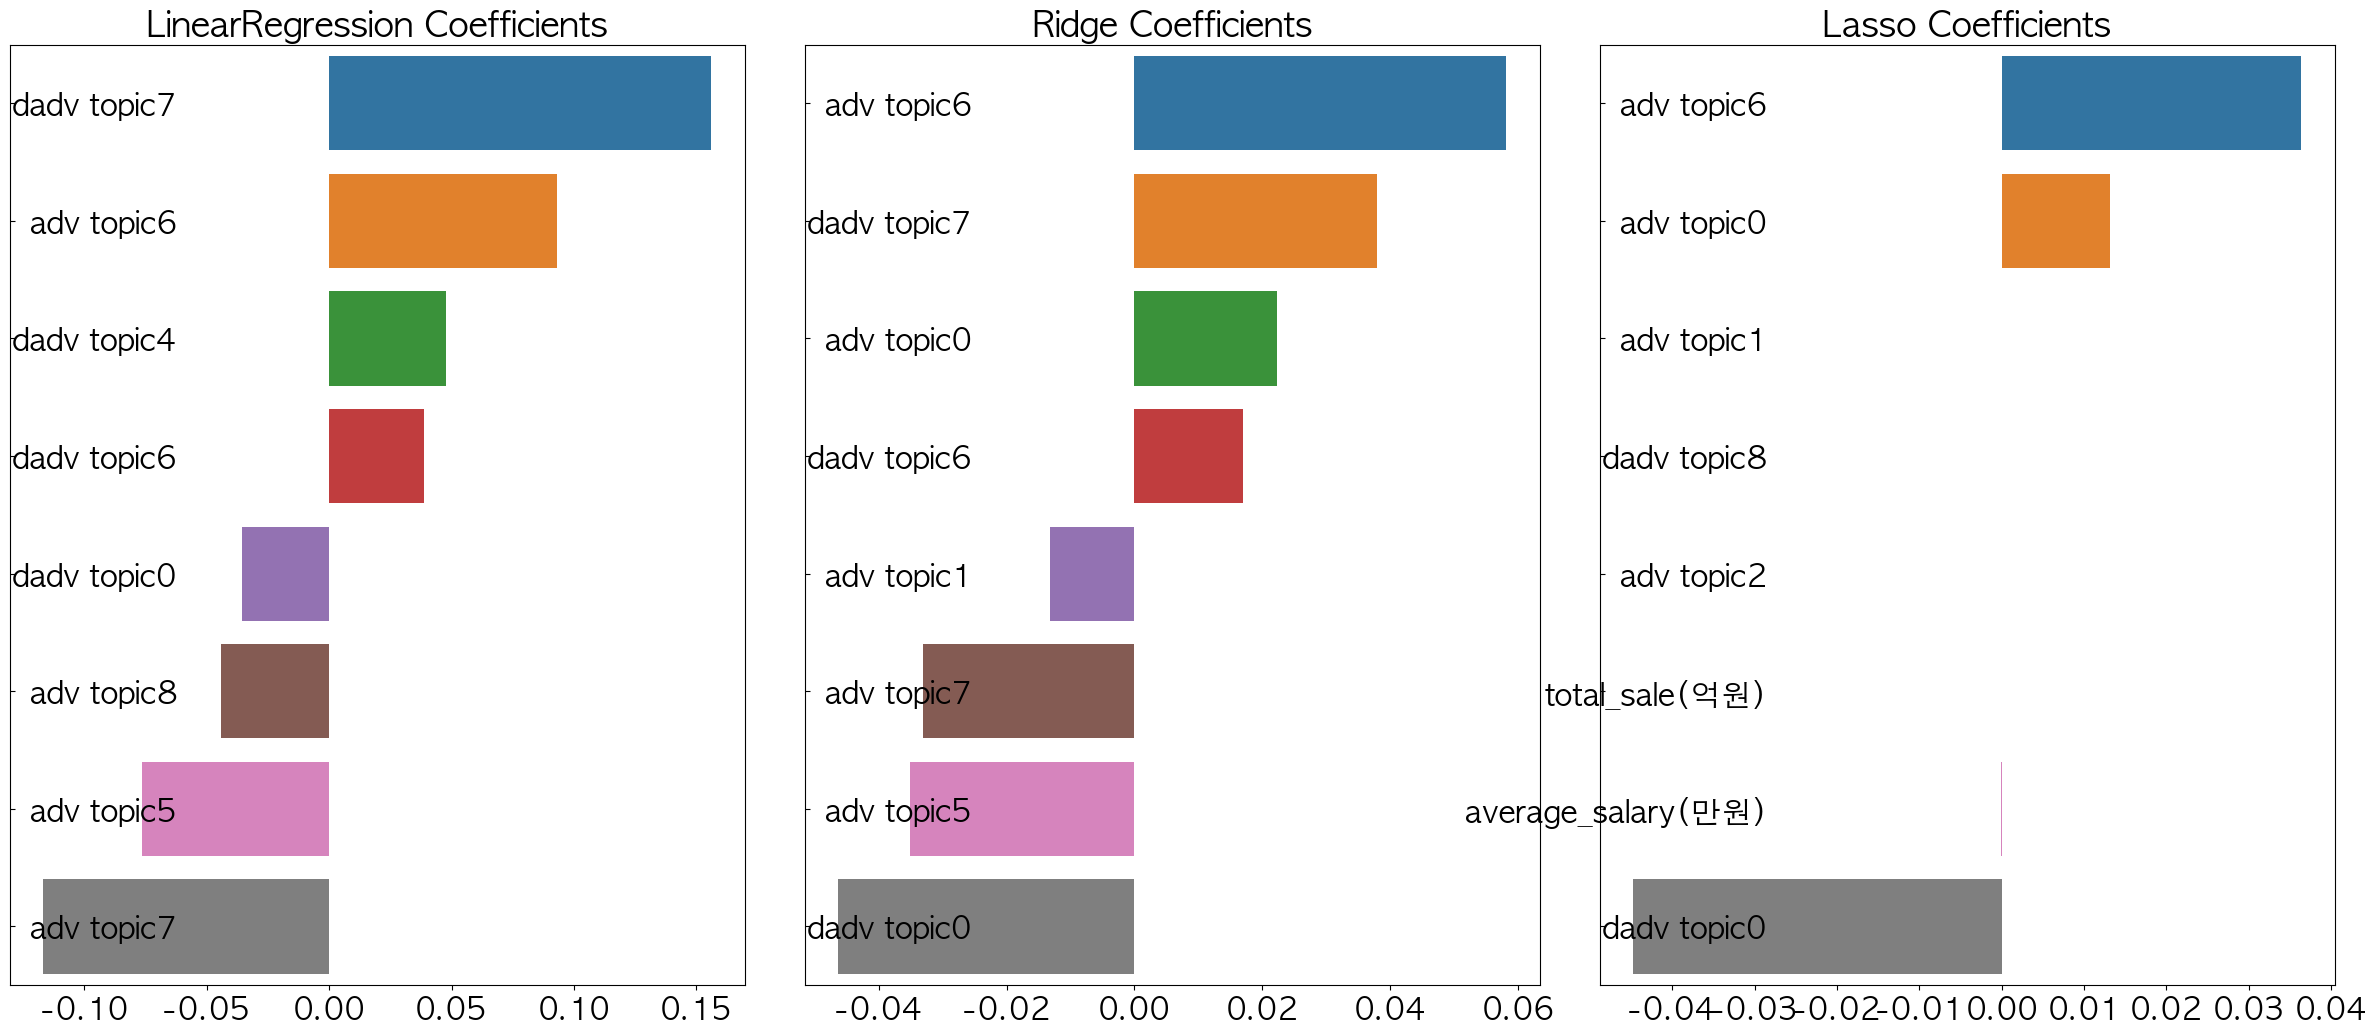

In [55]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

In [56]:
# Finding Skewed Feature
from scipy.stats import skew

feature_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[feature_index].apply(lambda x: skew(x))

skew_feature_top = skew_features[skew_features > 1]
print(skew_feature_top.sort_values(ascending=False))

total_sale(억원)        20.122063
adv topic8            13.815326
dadv topic7           13.411225
dadv topic5           13.142907
dadv topic8           11.996999
dadv topic6           11.460329
adv topic7            11.329678
dadv topic4           10.865848
adv topic6             7.503293
dadv topic3            7.039263
adv topic5             6.815135
adv topic4             5.098039
dadv topic2            4.062547
adv topic2             3.427072
adv topic3             3.117520
adv topic0             2.591717
average_salary(만원)     1.832503
dadv topic1            1.656662
turn_over_rate         1.203779
dtype: float64


In [57]:
# log transformation for skewed values
for feature in skew_feature_top.index:
    nonzero_indices = df[feature] != 0  # 0이 아닌 값의 인덱스를 찾음
    addup = min(df[nonzero_indices][feature])
    df[feature] = np.log1p(df[feature]+addup)

In [58]:
y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 7)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0146, best average RMSE: 0.1207, best alpha: {'alpha': 8}


Lasso After 5 CV, best average MSE: 0.0145, best average RMSE: 0.1206, best alpha: {'alpha': 0.001}




LinearRegression  RMSE:  0.119
Ridge  RMSE:  0.119
Lasso  RMSE:  0.118


LinearRegression  MAE:  0.095
Ridge  MAE:  0.095
Lasso  MAE:  0.094


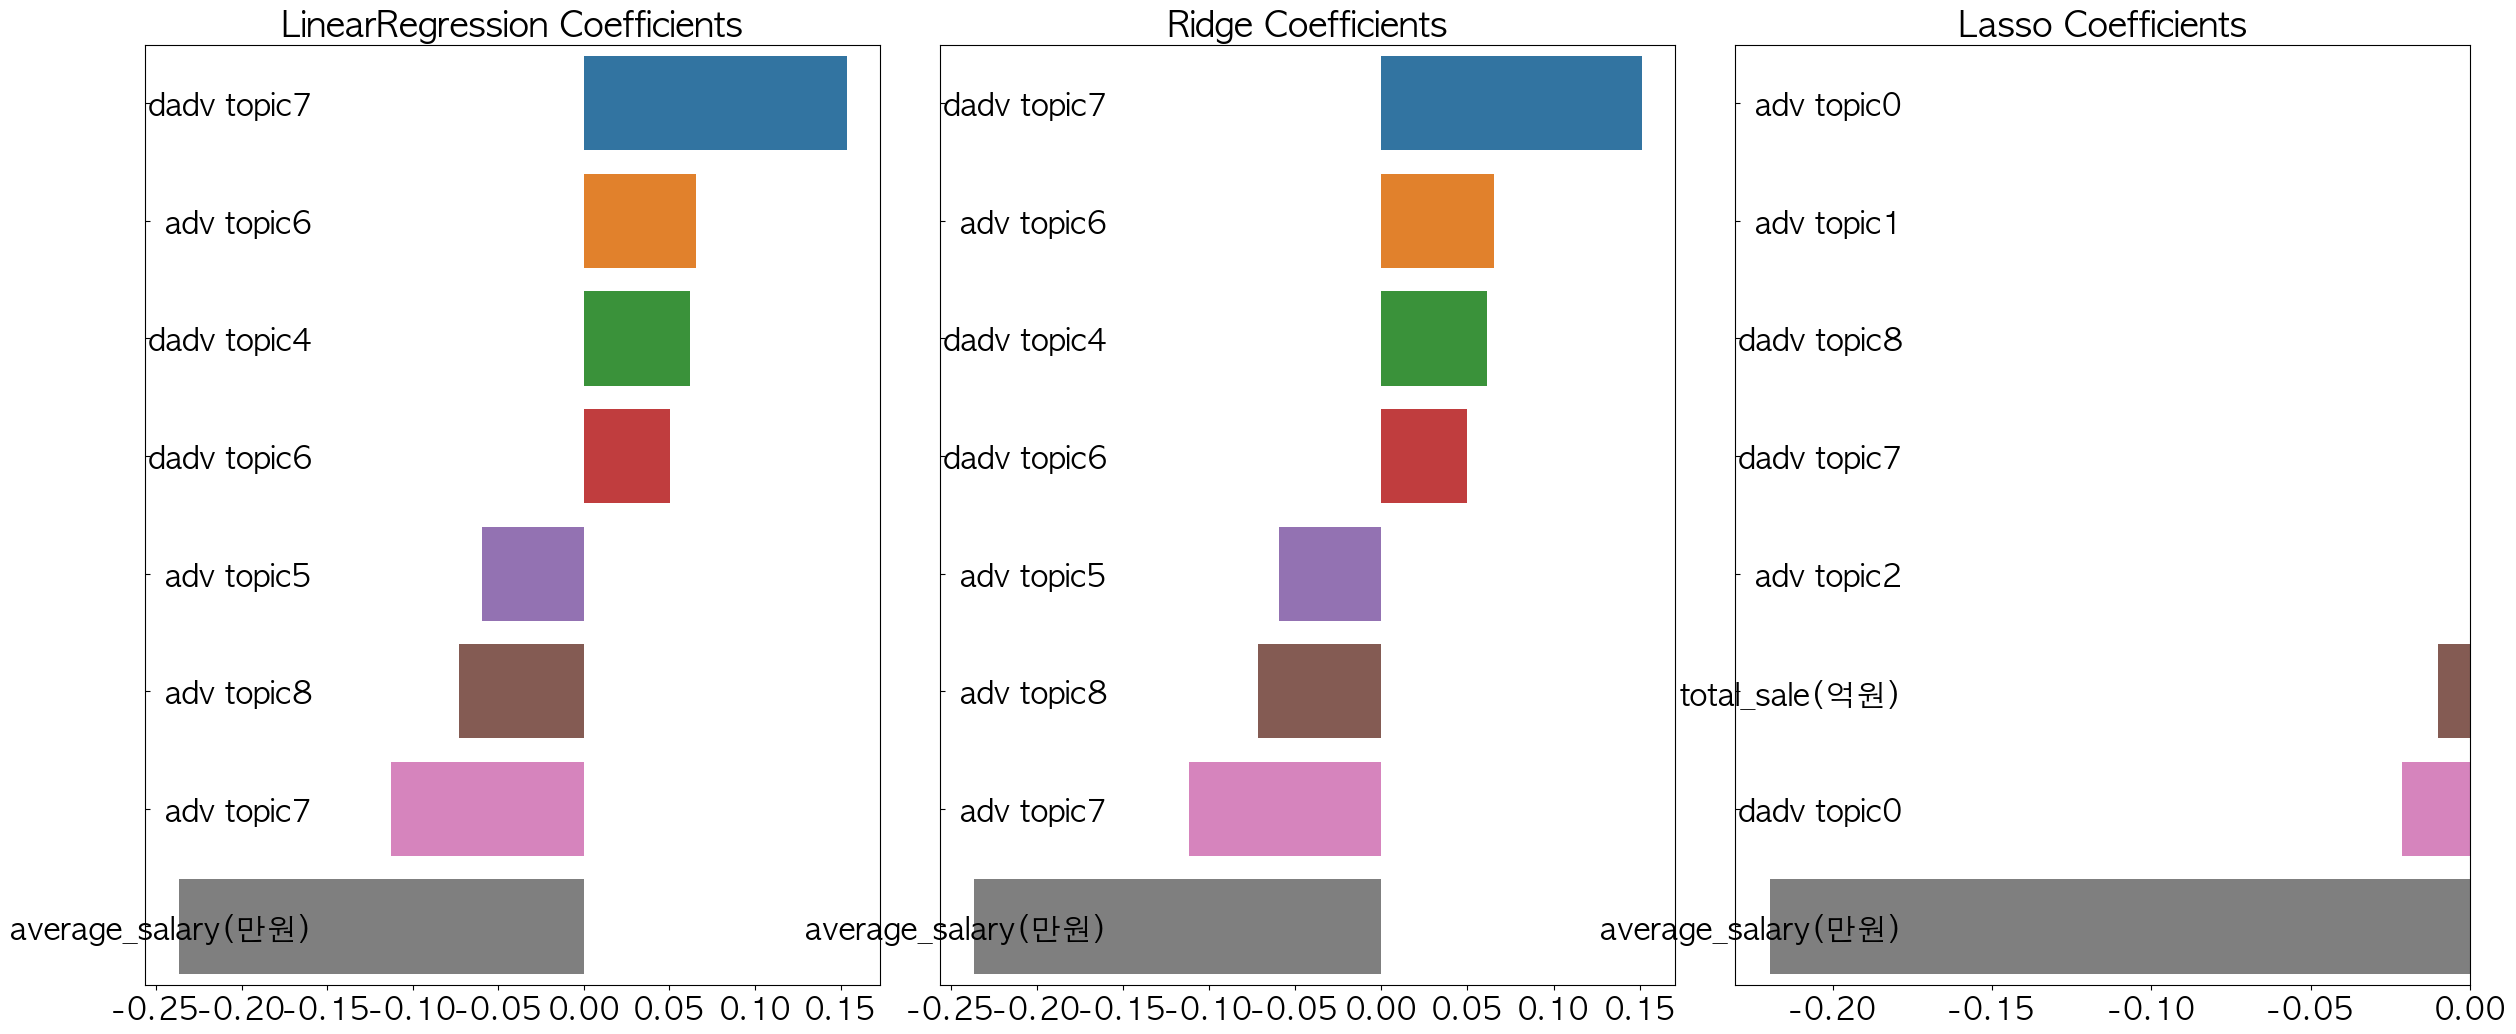

In [59]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_maes(models)

visualize_coefficient(models)

Decision Tree with Regression

xgbooost

In [60]:
from xgboost import XGBRegressor 

xgb_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'max_depth' : [4,6,8,10]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)

xgb_best_params = save_best_params(xgb_reg, xgb_params)

print(xgb_best_params)

XGBRegressor After 5 CV, best average MSE: 0.0143, best average RMSE: 0.1194, best alpha: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


In [61]:
# work after best params
xgb_reg = XGBRegressor(n_estimators = 500, learning_rate = 0.05, max_depth = 4, colsample_bytree = 0.5, subsample = 0.8)
xgb_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(xgb_reg)
get_rmse(xgb_reg)

XGBRegressor  MAE:  0.093
XGBRegressor  RMSE:  0.118


0.11776532991380766

light gbm

In [62]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'num_leaves' : [4, 6, 8, 10]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_best_params = save_best_params(lgbm_reg,lgbm_params)

print(lgbm_best_params)

LGBMRegressor After 5 CV, best average MSE: 0.0137, best average RMSE: 0.117, best alpha: {'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 4}


{'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 4}


In [63]:
# work after best params
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(lgbm_reg)
get_rmse(lgbm_reg)

LGBMRegressor  MAE:  0.088
LGBMRegressor  RMSE:  0.115


0.11465997867610316

gradient boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'max_depth' : [4,6,8,10]}
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.05, subsample=0.6 )
gb_best_params = save_best_params(gb_reg,gb_params)

print(gb_best_params)

GradientBoostingRegressor After 5 CV, best average MSE: 0.0146, best average RMSE: 0.1208, best alpha: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 750}


{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 750}


In [65]:
# work after best params
gb_reg = GradientBoostingRegressor(n_estimators=750, learning_rate= 0.05, subsample=0.6, max_depth=10 )
gb_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(gb_reg)
get_rmse(gb_reg)

GradientBoostingRegressor  MAE:  0.093
GradientBoostingRegressor  RMSE:  0.12


0.12037375244611807

random forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': [500, 750, 1000],
             'max_depth' : [4,6,8,10]}
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_best_params = save_best_params(rf_reg,rf_params)

print(rf_best_params)

RandomForestRegressor After 5 CV, best average MSE: 0.0132, best average RMSE: 0.115, best alpha: {'max_depth': 4, 'n_estimators': 500}


{'max_depth': 4, 'n_estimators': 500}


In [67]:
# work after best params

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train,y_train)

get_mae(rf_reg)
get_rmse(rf_reg)

RandomForestRegressor  MAE:  0.088
RandomForestRegressor  RMSE:  0.114


0.11417839409220125

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {'max_depth' : [4,6,8,10]}
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_best_params = save_best_params(dt_reg, dt_params)

print(dt_best_params)

DecisionTreeRegressor After 5 CV, best average MSE: 0.0149, best average RMSE: 0.1221, best alpha: {'max_depth': 4}


{'max_depth': 4}


In [69]:
# work after best params

dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train,y_train)

get_mae(dt_reg)
get_rmse(dt_reg)

DecisionTreeRegressor  MAE:  0.09
DecisionTreeRegressor  RMSE:  0.115


0.11530933799381256

<Axes: >

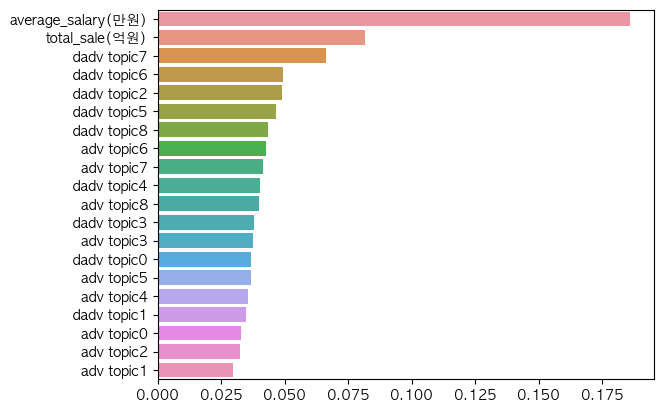

In [70]:
# Feature graph xgb
xgb_reg.fit(x_data.astype(float), y_target.astype(float))

feature_series = pd.Series(data = xgb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

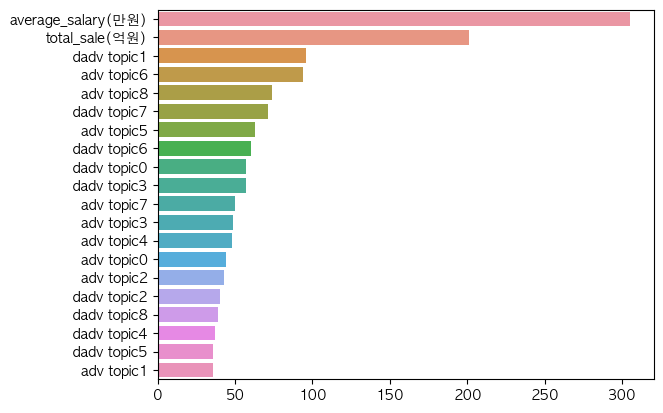

In [71]:
# Feature Graph lgbm
lgbm_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = lgbm_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

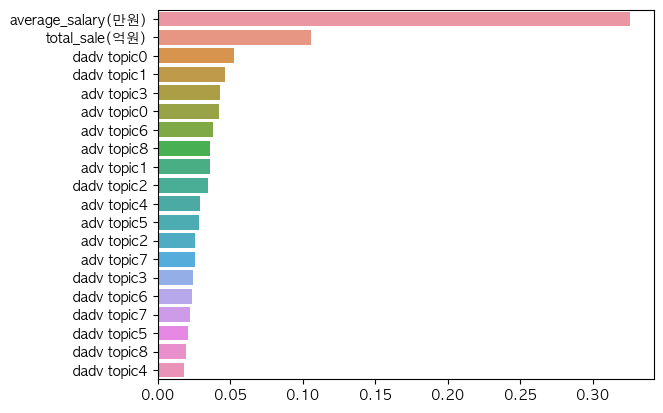

In [72]:
# Feature graph gradient boosting

gb_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = gb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

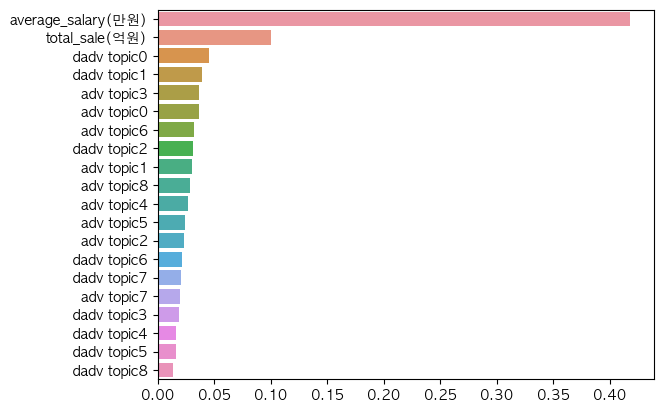

In [73]:
# Feature graph randomforest

rf_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

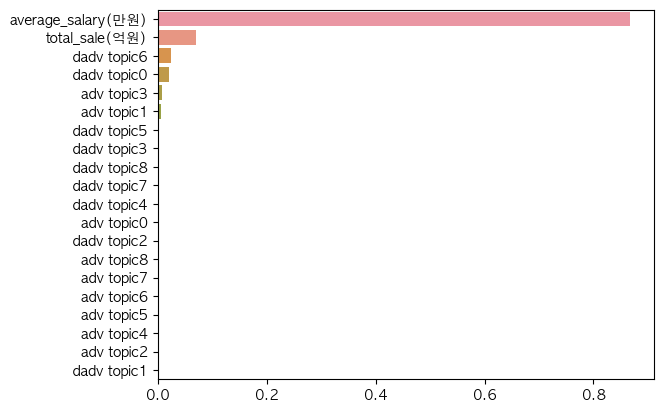

In [74]:
# Feature Graph DecisionTree
dt_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = dt_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

Export Trained Model

In [75]:
import pickle
import joblib

# joblib.dump(lgbm_reg,"tp_lgbm_reg_model.pkl")
joblib.dump(xgb_reg,"tp_xgb_reg_model.pkl")

['tp_xgb_reg_model.pkl']